# Problem Set 2 - The AutoMPG Dataset

The AutoMPG dataset is available from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

The features are given in the following order:

1. `mpg`: continuous 
2. `cylinders`: multi-valued discrete 
3. `displacement`: continuous 
4. `horsepower`: continuous 
5. `weight`: continuous 
6. `acceleration`: continuous 
7. `model` year: multi-valued discrete 
8. `origin`: multi-valued discrete 
9. `car_name`: string (unique for each instance)

## Data Loading

The data is available as part of the R library, `ISLR`.

In [2]:
install.packages('ISLR')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(ISLR)

In [4]:
dim(Auto)

[1] 392   9

In [5]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [6]:
Auto$origin = as.factor(Auto$origin)

In [7]:
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


# simple linear regression 

(1) Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. 
   - Save the result of the fit as `lm.fit`.  

In [8]:
lm.fit=lm(mpg~horsepower,data=Auto)
#stop('Not implemented.')

In [9]:
lm.fit
stopifnot(all(names(lm.fit) == c('coefficients','residuals','effects','rank','fitted.values','assign','qr','df.residual','xlevels','call','terms','model')))
stopifnot(round(lm.fit$coefficients[1], 4) == 39.9359)
stopifnot(round(lm.fit$coefficients[2], 4) == -0.1578)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Coefficients:
(Intercept)   horsepower  
    39.9359      -0.1578  



(2) Use the `summary()` function to print the results.

In [38]:
# your code here
summary(lm.fit)
#stop('Not implemented.')


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


(3) Answer these questions:
1. True/False: There a relationship between the predictor and the response.
1. How strong (numerically) is the relationship between the predictor and the response?
1. True/False: If the predictor increases, the model predicts that the response will increase. 
1. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [12]:
# your code here
question_3_1 <- function(){
    return(TRUE)
}
question_3_2 <- function(){
    return(-0.157845)
}
question_3_3 <- function(){
    return(FALSE)
}
question_3_4 <- function(){
    return(predict(lm.fit, data.frame("horsepower"=98), interval="confidence"))
    
}
#stop('Not implemented.')

In [13]:
question_3_1()
question_3_2()
question_3_3()
question_3_4()

# HIDDEN TESTS HERE

[1] TRUE

[1] -0.157845

[1] FALSE

,fit,lwr,upr
1,24.46708,23.97308,24.96108


(4) Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

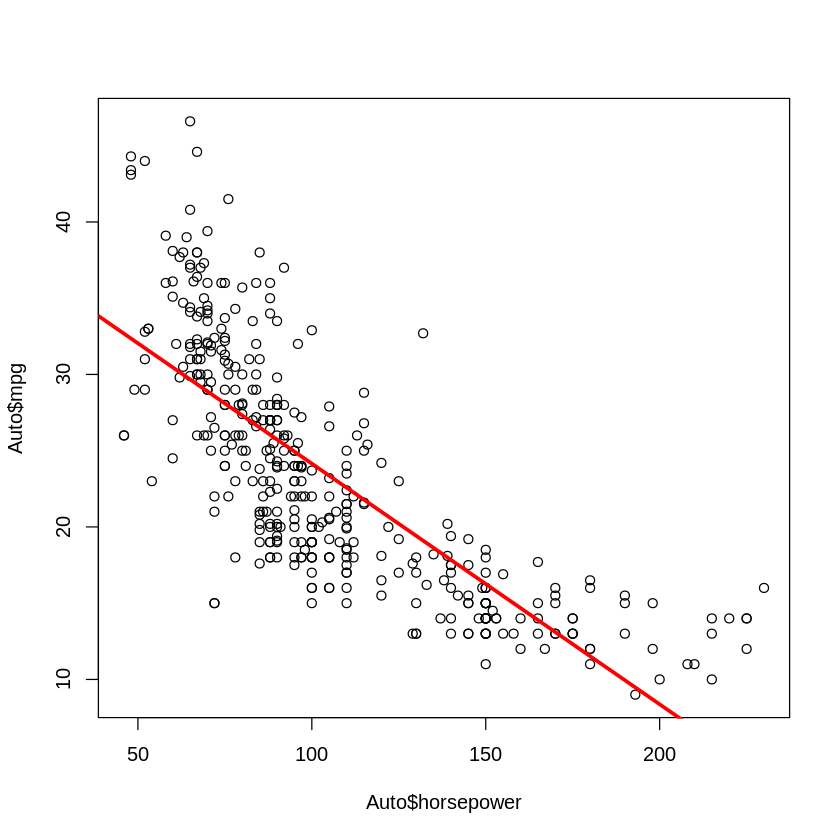

In [14]:
# your code here
plot(Auto$horsepower, Auto$mpg)
abline(lm.fit, lwd=3, col="red")
#stop('Not implemented.')

### Single Variable Regression on Each Feature

In [15]:
features = c("cylinders","displacement","horsepower","weight","acceleration","year")
numerical_subset = Auto[,c(features, 'mpg')]

In [16]:
summary(numerical_subset)

   cylinders      displacement     horsepower        weight      acceleration  
 Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613   Min.   : 8.00  
 1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225   1st Qu.:13.78  
 Median :4.000   Median :151.0   Median : 93.5   Median :2804   Median :15.50  
 Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978   Mean   :15.54  
 3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615   3rd Qu.:17.02  
 Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140   Max.   :24.80  
      year            mpg       
 Min.   :70.00   Min.   : 9.00  
 1st Qu.:73.00   1st Qu.:17.00  
 Median :76.00   Median :22.75  
 Mean   :75.98   Mean   :23.45  
 3rd Qu.:79.00   3rd Qu.:29.00  
 Max.   :82.00   Max.   :46.60  

In [17]:
for(i in 1:length(features)) {
    fit_formula = as.formula(paste("mpg ~ ", features[i]))
    print(lm(fit_formula, data = Auto)$coefficients[2])
}

cylinders 
-3.558078 
displacement 
 -0.06005143 
horsepower 
-0.1578447 
      weight 
-0.007647343 
acceleration 
    1.197624 
    year 
1.230035 


(5) Answer these questions about the single variable regression on each feature. 

1. True/False: Accoriding to these results, `year` is the strongest predictor of `mpg`.
1. True/False: It is safe to say that `weight` is not an important feature.

In [1]:
# your code here
question_5_1 <- function(){
    FALSE
}
question_5_2 <- function(){
    FALSE
}
#stop('Not implemented.')

In [2]:
question_5_1()
question_5_2()

# HIDDEN TESTS HERE

[1] FALSE

[1] FALSE

## multiple linear regression

This question involves the use of multiple linear regression on the Auto data set.

(6) Produce a scatterplot matrix which includes all of the variables in the data set.

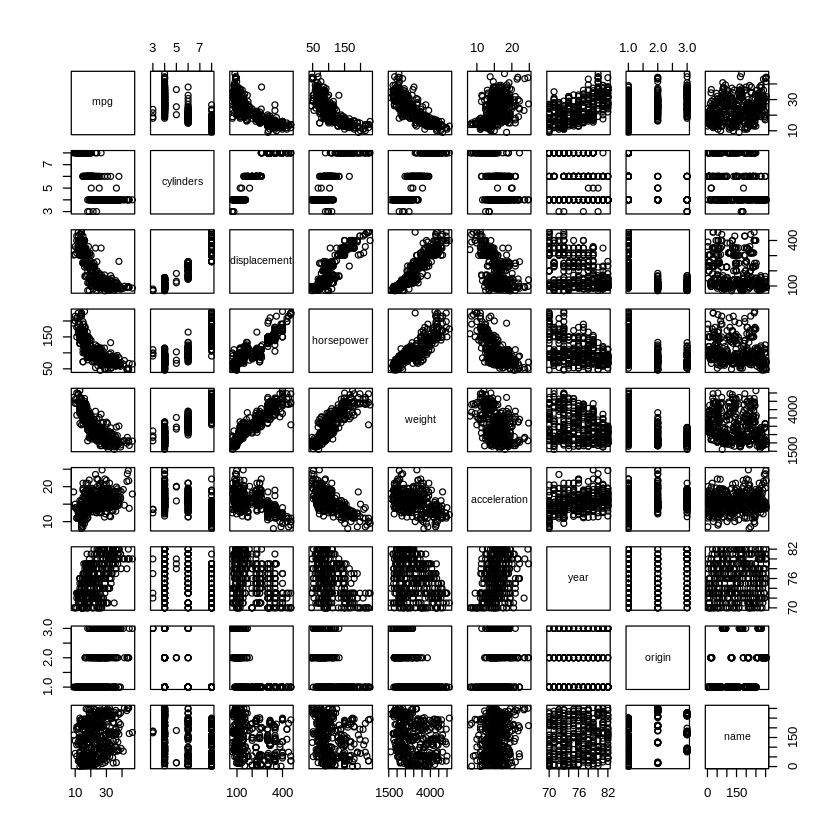

In [47]:
pairs(Auto)

(7) Compute the matrix of correlations between the numerical variables (exclude `origin` and `name`) using the function `cor()`. 

   - store the resulting correation matrix as the variable `auto_cor_mat`.

In [48]:
# your code here
Auto_num <- Auto[,sapply(Auto, is.numeric)]
auto_cor_mat <- cor(Auto_num)
#stop('Not implemented.')

In [49]:
auto_cor_mat
stopifnot(dim(auto_cor_mat) == c(7,7))
stopifnot(all(round(auto_cor_mat["mpg", c("cylinders", "horsepower", "year")], 2) == c(-0.78, -0.78, 0.58)))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000


(8) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `origin` and `name` as the predictors. Use the `summary()` function to print the results. 

Recall that these were the coefficients identified when each was fit individually:

    cylinders 
    -3.558078 
    displacement 
     -0.06005143 
    horsepower 
    -0.1578447 
          weight 
    -0.007647343 
    acceleration 
        1.197624 
        year 
    1.230035 

In [50]:
# your code here
lm.fit.A <- lm(mpg~cylinders+displacement+horsepower+weight+acceleration+year, data=Auto)
summary(lm.fit.A)
#stop('Not implemented.')


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + year, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6927 -2.3864 -0.0801  2.0291 14.3607 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.454e+01  4.764e+00  -3.051  0.00244 ** 
cylinders    -3.299e-01  3.321e-01  -0.993  0.32122    
displacement  7.678e-03  7.358e-03   1.044  0.29733    
horsepower   -3.914e-04  1.384e-02  -0.028  0.97745    
weight       -6.795e-03  6.700e-04 -10.141  < 2e-16 ***
acceleration  8.527e-02  1.020e-01   0.836  0.40383    
year          7.534e-01  5.262e-02  14.318  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.435 on 385 degrees of freedom
Multiple R-squared:  0.8093,	Adjusted R-squared:  0.8063 
F-statistic: 272.2 on 6 and 385 DF,  p-value: < 2.2e-16


Answer these questions: 
1. TRUE/FALSE: Every feature is less important in the full model than when fit individually. 
2. TRUE/FALSE: According to this model, The most important feature is `cylinders`.
3. TRUE/FALSE: According to this model, `cylinders`, `acceleration`, and `year` are the most important features.


In [51]:
# your code here
question_8_1 <- function(){
    TRUE
}
question_8_2 <- function(){
    FALSE
}
question_8_3 <- function(){
    TRUE
}
#stop('Not implemented.')

In [29]:
question_8_1()
question_8_2()
question_8_3()

# HIDDEN TESTS HERE

[1] TRUE

[1] FALSE

[1] TRUE